# Predicting heart disease using ML

The notebook aims at building ML models predicting whether someone has heart disease or not. This is how the notebook is structured:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
7. Experimentation

# 1. Problem Definition
Given the clinical parameters about a patient, can a ML model predict whether or not they have a heart disease. The parameters are presented and described in section 4. Features.

The models used are:
- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest

# 2. Data
The data is downloaded from Cleavland data from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/45/heart+disease

# 3. Evaluation
I aim to reach an accuracy of 95% of predicting whether or not a patient has a heart disease for each of the models applied.

# 4. Features
The parameters for each patient in the dataset that are used to determine whether they have a heart disease or not. 

* age in years
* sex (1=male, 0=female)
* cp - chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1=true, 0=false)
* restecg - resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing

# Importing tools

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics from sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Load in data

In [3]:
# load in data
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## EDA

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

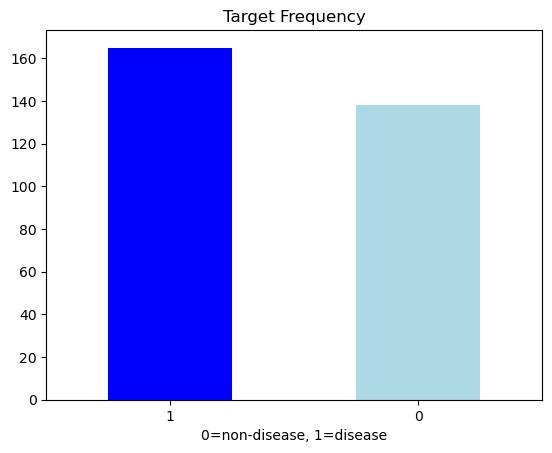

In [6]:
df.target.value_counts().plot(kind="bar", color=["blue", "lightblue"], title="Target Frequency", rot=0, xlabel="0=non-disease, 1=disease")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# check missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# compare target col with sex col
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


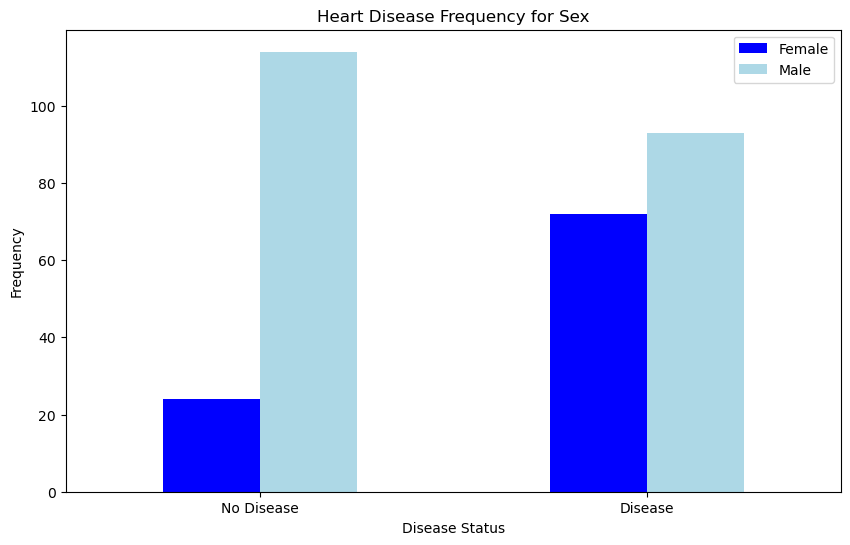

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["blue","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Disease Status")
plt.ylabel("Frequency")
plt.xticks(ticks=[0,1], rotation=0, labels=["No Disease", "Disease"])
plt.legend(labels=["Female", "Male"])
plt.show()

### Age vs Max heart rate for heart disease

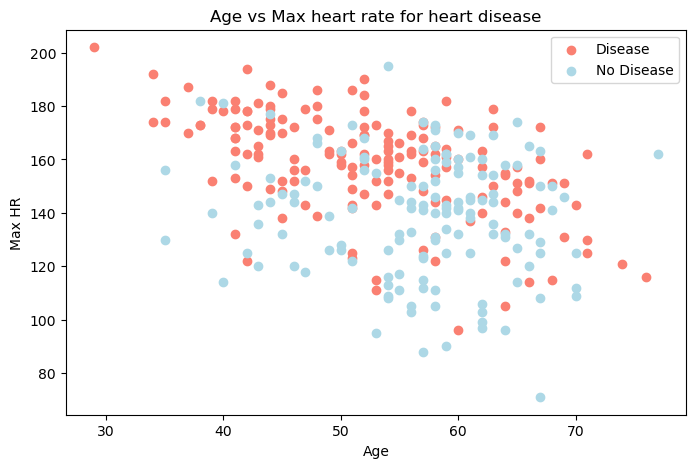

In [13]:
plt.figure(figsize=(8,5))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
            c="salmon"
           )
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
            c="lightblue"
           )
plt.title("Age vs Max heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("Max HR")
plt.legend(labels=["Disease", "No Disease"])
plt.show()
plt.clf()

### Age distribution

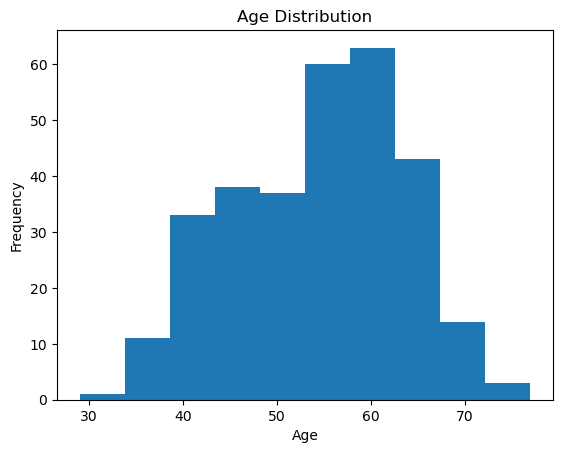

In [14]:
# plotting the distribution of age
plt.hist(df.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

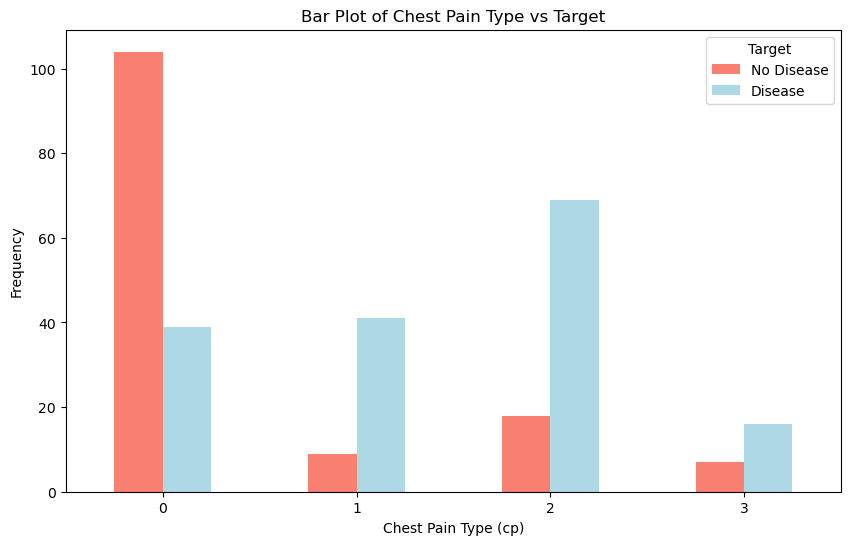

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title('Bar Plot of Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Target', loc='upper right', labels=["No Disease", "Disease"])
plt.show()

### correlation matrix

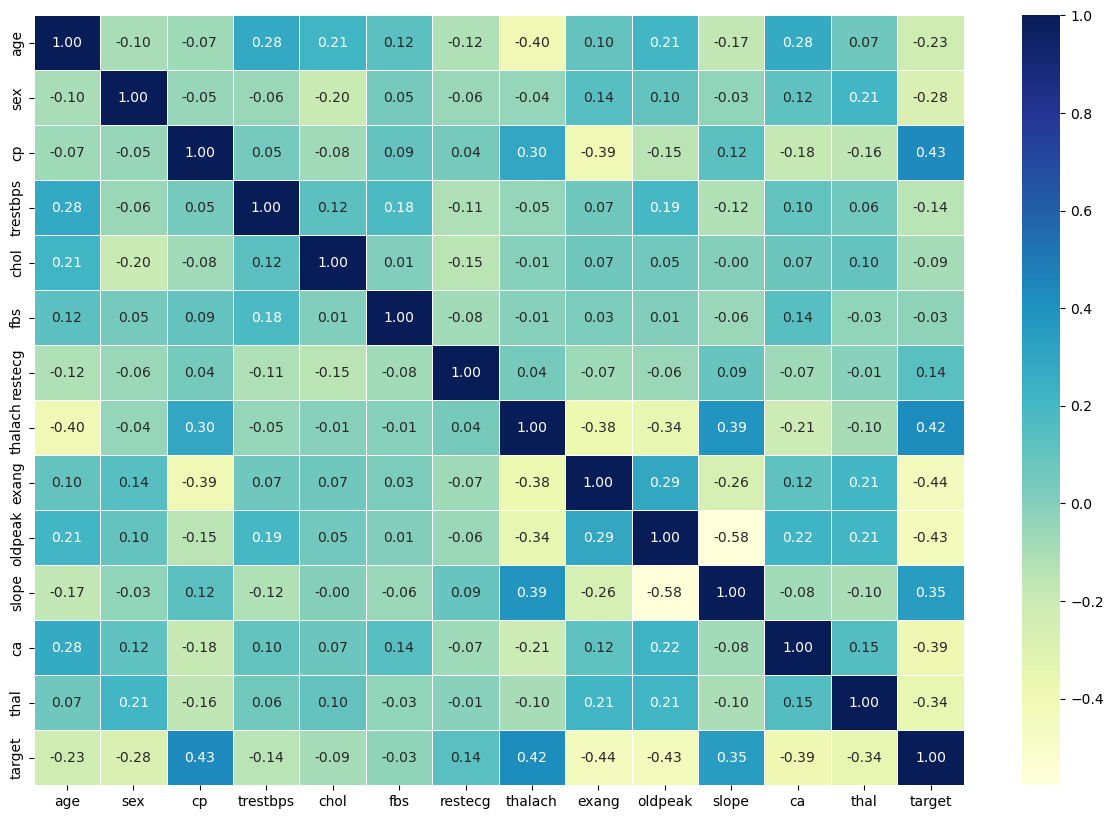

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu",
                ax=ax)

plt.show()

# 5. Modelling


In [17]:
# split data
X = df.drop("target", axis=1)
y = df.target

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
len(X), len(X_train), len(X_test)

(303, 242, 61)

In [21]:
#Put models in a dictionary
models = {
        "Logistic Regression": Pipeline([
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(max_iter=1000))
        ]),
        "KNN": Pipeline([
            ("scaler", StandardScaler()),
            ("model", KNeighborsClassifier())
        ]),
        "Random Forest": RandomForestClassifier()
    }

def fit_and_score(models: dict, X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.Series, y_test: pd.Series) -> dict:
    """
    Fits and evaluates ML models in 'models'.

    Parameters
    ----------
    models: dict
        a dict of different Scikit-learn ML models
    X_train: pd.DataFrame
        training data (no labels)
    X_test: pd.DataFrame
        test data (no labels)
    y_train: pd.Series
        training labels
    y_test: pd.Series
        test labels

    Returns
    -------
    dict
        a dictionary of score for each model in 'models'
    """

    np.random.seed(42)

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores
    



In [22]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

# 6. Experimentation

## Model comparison

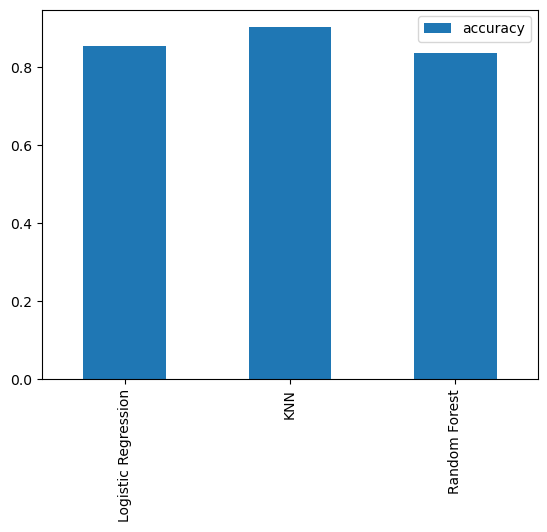

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

## Improving model

### Hyperparameter tuning

#### KNN

In [24]:
train_scores = []
test_scores = []

neighbours = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

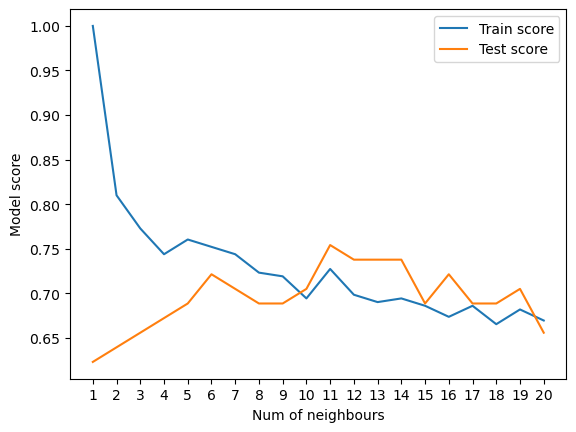

Maximum KNN score on the test data: 75.41%


In [27]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Num of neighbours")
plt.ylabel("Model score")
plt.legend()
plt.show()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [28]:
# finding the optimal neighbour number
neigh_num_optimal = 0
best_neigh_score = 0
for neigh_num, score in zip(neighbours, test_scores):
    if score > best_neigh_score:
        best_neigh_score = score
        neigh_num_optimal = neigh_num

print(f"Optimal num of neighbours: {neigh_num_optimal}")

Optimal num of neighbours: 11


#### Logistic Regression and RandomForestClassifier with RandomizedSearchCV

Tuning:
- LogisticRegression()
- RandomForestClassifier()

##### Tuning Logistic Regression with RandomizedSearchCV

In [29]:
# Create hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}



In [30]:
# Tune logistic regression
np.random.seed(42)

# setup random hyperparameter seasrch for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter seartch model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

##### Tuning RandomForestClassifier() with RandomizedSearchCV

In [33]:
# Create hyperparamter frid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1,20,2)}

In [34]:
np.random.seed(42)

# setup random hyperparameter search for RFC()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          verbose=True)

# fit random hyperparamterer search model for RFC
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# Find best hyperparams
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [36]:
# evaluate randomized seach RFC model
rs_rf.score(X_test, y_test)

0.8852459016393442

### Hyperparameter tuning with GridSearchCV

Improving LogisticRegression with GridsearchCV

In [37]:
# Different hyperparams for LogRegr model
log_reg_grid2 = {
    'C' : np.logspace(-4,4,20),
    'solver': ['liblinear']}

# setup grid hyperparams search for LogRegr
gs_log_reg = GridSearchCV(LogisticRegression(max_iter=1000),
                          param_grid=log_reg_grid2,
                          cv=5,
                          verbose=True)

# Fit
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
#check best hyperparms


In [39]:
# Evaluate grid search LogRegr model
gs_log_reg.fit(X_train, y_train)
gs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [40]:
print(f'Accuracy - : {gs_log_reg.score(X_test,y_test):.3f}')

Accuracy - : 0.885


#### Evaluation of classifier - beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

In [41]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

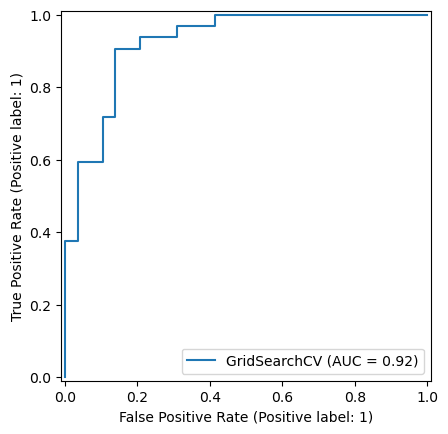

In [43]:
# ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test)
plt.show()

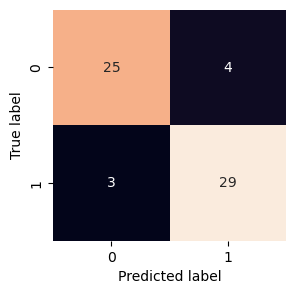

In [44]:
# confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_preds)
plt.show()

In [45]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
# calculate evaluation metrics using cross-validation
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [47]:
clf = LogisticRegression(C=gs_log_reg.best_params_['C'], solver=gs_log_reg.best_params_['solver'])

In [48]:
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [49]:
cv_acc = np.mean(cv_acc)

In [50]:
# cross validated presicion
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [51]:
# cross validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [52]:
# cross validated f1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

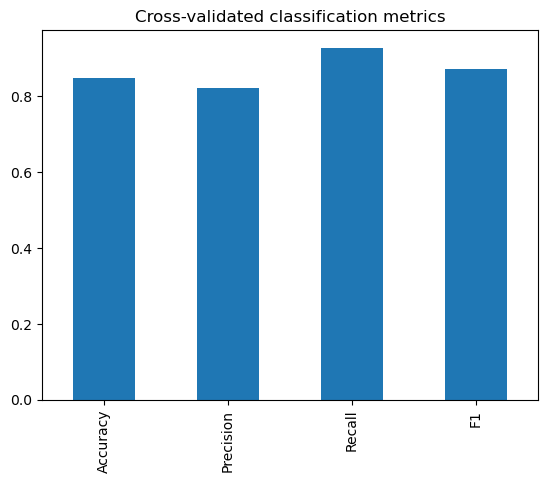

In [53]:
# visualising cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)
plt.show()

### Feature importance

Which feature contributed most to the outcomes of the model?

In [54]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=gs_log_reg.best_params_['C'], solver=gs_log_reg.best_params_['solver'])
clf.fit(X_train, y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [55]:
#Checking coeff
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [56]:
# Match coefs's of features to columns
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.0036992183633085857,
 'sex': -0.9042408474114028,
 'cp': 0.6747282820013463,
 'trestbps': -0.01161340415475584,
 'chol': -0.0017036448092066976,
 'fbs': 0.04787689082536315,
 'restecg': 0.33490184455843097,
 'thalach': 0.02472938514033986,
 'exang': -0.6312040052639052,
 'oldpeak': -0.5759090719885068,
 'slope': 0.4709511397091774,
 'ca': -0.6516535119713651,
 'thal': -0.6998419972478845}

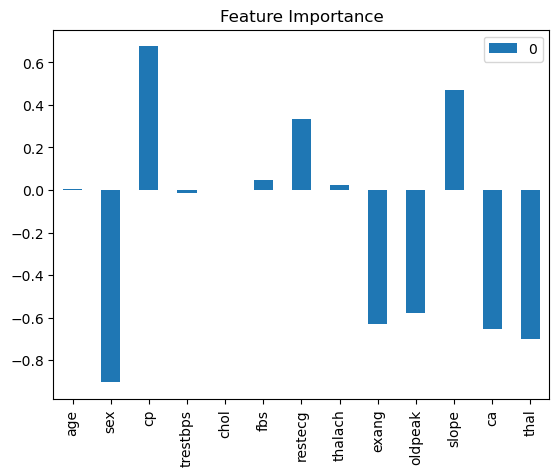

In [57]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance")
plt.show()